# Lindstedt's Perturbation Method

For nonlinear harmonic oscillator:

$$ \frac{d^2\theta}{dt^2} + \omega_0^2\sin{\theta} = 0 $$

For $\theta \ll 1$ we can write $\sin{\theta} \approx \theta - \frac{1}{6}\theta^3$:

$$ \frac{d^2\theta}{dt^2} + \omega_0^2\theta - \frac{1}{6}\theta^3 = 0 $$

Then:

$$ \theta = \theta_0\sin{\omega t} + \epsilon \theta_0 \sin{3\omega t} $$

After some calculations:

$$ \omega \approx \omega_0 \left(1 - \frac{1}{16}\theta_0^2 \right), \epsilon \approx \frac{1}{192}\theta_0^2 $$

And we substitute it to equation above.

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
t, theta0 = sp.symbols('t theta0')
theta = sp.Function('theta')(t)
theta

theta(t)

In [3]:
omega = 1 - theta0**2 / 16
omega

1 - theta0**2/16

In [4]:
epsilon = theta0**2 / 192
epsilon

theta0**2/192

In [5]:
diff_eq1 = sp.Eq(theta.diff(t, 2) + sp.sin(theta), 0)
diff_eq1

Eq(sin(theta(t)) + Derivative(theta(t), (t, 2)), 0)

In [6]:
diff_eq2 = sp.Eq(theta.diff(t, 2) + theta - theta**3 / 6, 0)
diff_eq2

Eq(-theta(t)**3/6 + theta(t) + Derivative(theta(t), (t, 2)), 0)

In [11]:
sol_approx = theta0 * sp.sin(omega * t) + epsilon * theta0 * sp.sin(3 * omega * t)
sol_approx

theta0**3*sin(t*(3 - 3*theta0**2/16))/192 + theta0*sin(t*(1 - theta0**2/16))

## $\theta_0 = \frac{1}{10}$

In [15]:
theta0_val = sp.Rational(1, 10)
sol_approx_theta = sol_approx.subs(theta0, theta0_val)
sol_approx_theta

sin(1599*t/1600)/10 + sin(4797*t/1600)/192000

In [45]:
# function to avoid code repetition
def compare_parameters(*parameters, t_end=10):
    t_a, t_b, quality = 0, t_end, 500
    t_values = np.linspace(t_a, t_b, quality)
    y_values = []
    for parameter in parameters:
        initial_theta = [0, parameter]
        sol_approx_theta = sol_approx.subs(theta0, parameter)
        y_values_analytic = evaluate_function(sol_approx_theta, t, t_values)
        _, y_values_sin = solve_numerically_second_order_ode(diff_eq1, theta, t, t_values, 0, initial_theta)
        _, y_values_theta = solve_numerically_second_order_ode(diff_eq2, theta, t, t_values, 0, initial_theta)
        y_values.append((y_values_analytic, y_values_sin[0], y_values_theta[0]))
    figure, axes = plt.subplots(1, len(y_values), layout='constrained', figsize=(2 + 4*len(y_values), 6))
    for index, (ax, y) in enumerate(zip(figure.axes, y_values)):
        ax.plot(t_values, y[0], label='analytic', color='black', linewidth=6)
        ax.plot(t_values, y[1], label='sin', color='blue', linewidth=3, linestyle='--')
        ax.plot(t_values, y[2], label='theta', color='maroon', linewidth=1, linestyle=':')
        ax.legend()
        ax.grid()
        ax.set(xlabel=f'${t}$', ylabel=f'${sp.latex(theta)}$', title=f'${sp.latex(theta0)} = {parameters[index]}$')

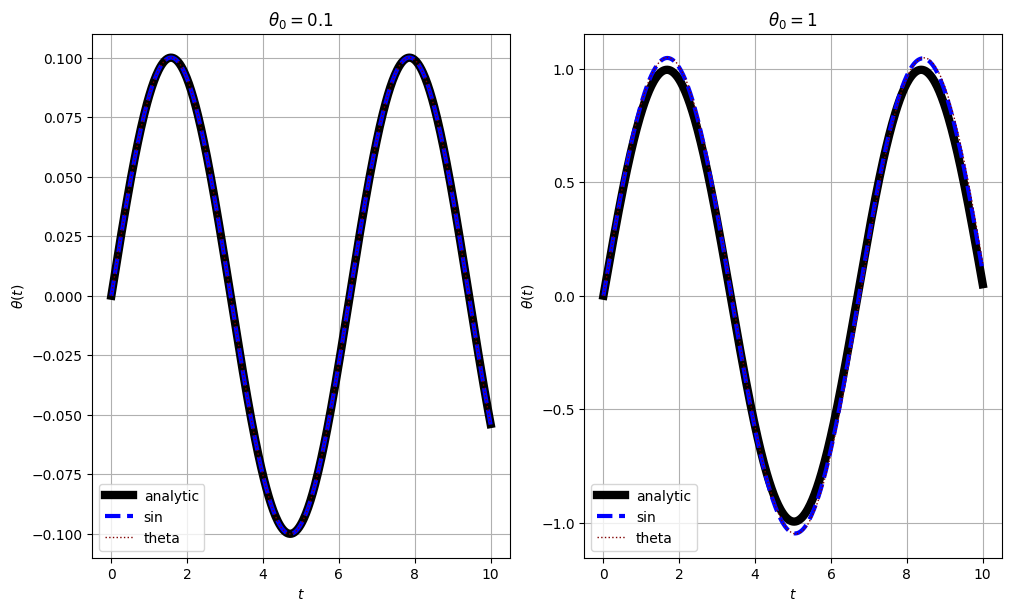

In [46]:
compare_parameters(0.1, 1)

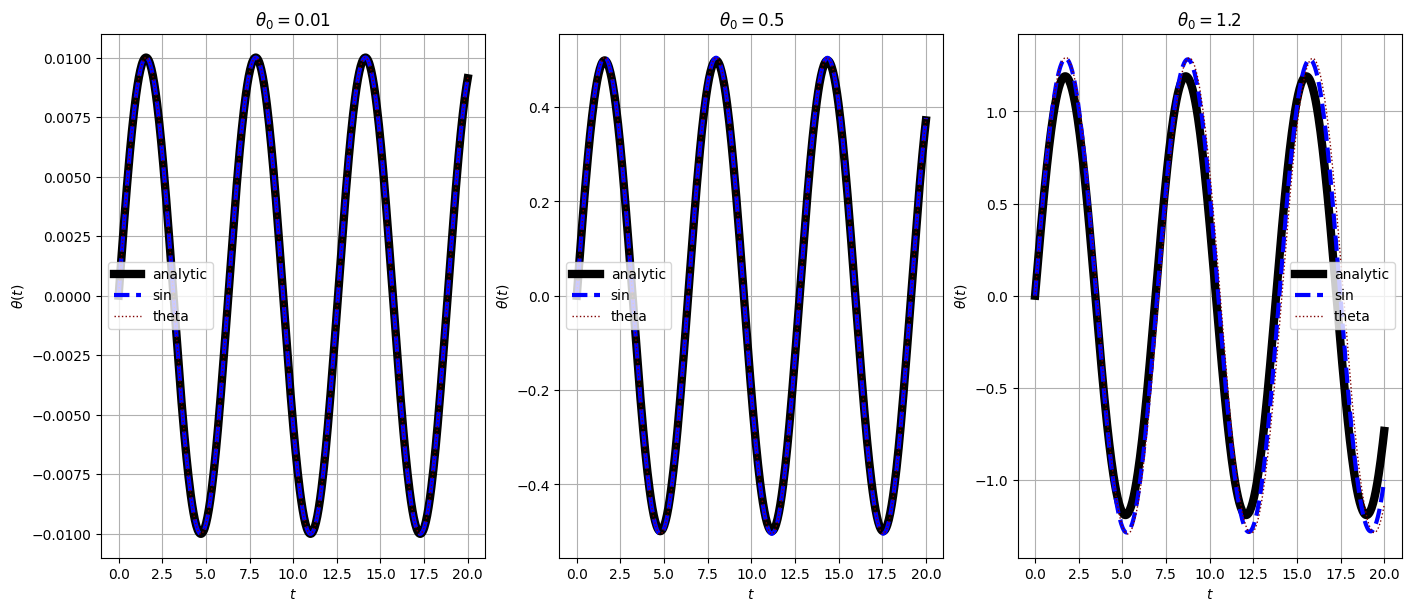

In [47]:
compare_parameters(0.01, 0.5, 1.2, t_end=20)

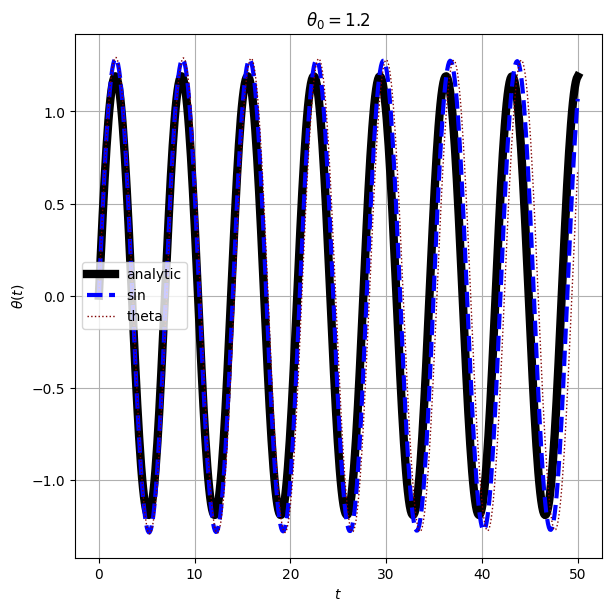

In [49]:
compare_parameters(1.2, t_end=50)